## K-means聚类

### 前一种无监督学习模型为：降维，另一种是聚类算法！

*　在Scikit-Learn中， sklearn.cluster.KMeans 中实现

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # 绘图风格
import numpy as np

k-means 算法在不带标签的多维数据集中寻找确定数量的簇。最优的聚类结果需要符合以下两个假设。

* “簇中心点”（cluster center）是属于该簇的所有数据点坐标的算术平均值。

* 一个簇的每个点到该簇中心点的距离，比到其他簇中心点的距离短。

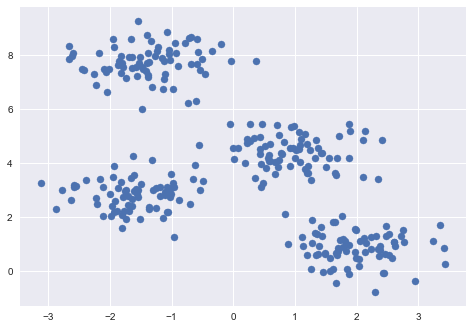

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [3]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

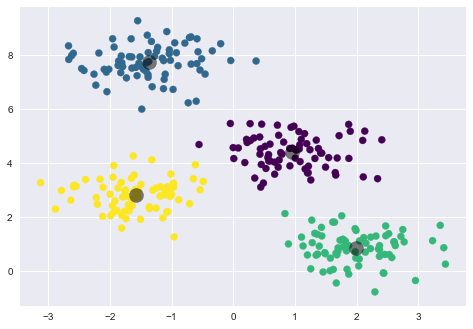

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_   #聚类中心

#画出簇中心
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

### k-means算法： 期望最大化（expectation-maximization， E-M）

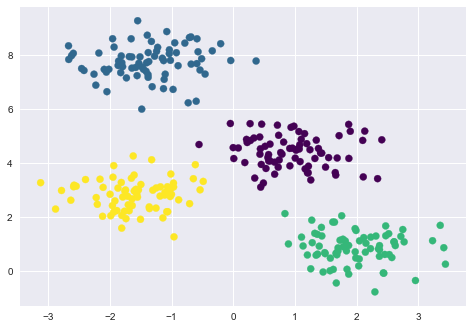

In [11]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X, n_clusters, rseed=2):
    # 1.随机选择簇中心点
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        # 2a.基于最近的中心指定标签
        labels = pairwise_distances_argmin(X, centers)
        # 2b.根据点的平均值找到新的中心
        new_centers = np.array([X[labels == i].mean(0)
        for i in range(n_clusters)])
        # 2c.确认收敛
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

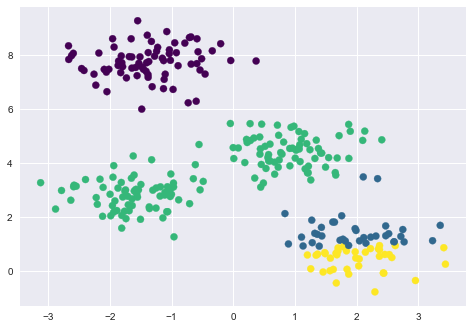

In [12]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
s=50, cmap='viridis');

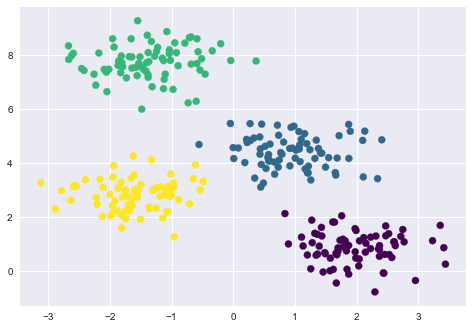

In [22]:
labels = KMeans(4, random_state=0).fit_predict(X)   #告诉他有4个簇
plt.scatter(X[:, 0], X[:, 1], c=labels,
s=50, cmap='viridis');

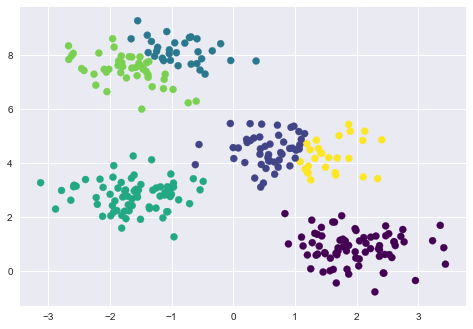

In [24]:
labels = KMeans(6, random_state=0).fit_predict(X)  #告诉他有6个簇，显然效果不好
plt.scatter(X[:, 0], X[:, 1], c=labels,
s=50, cmap='viridis');

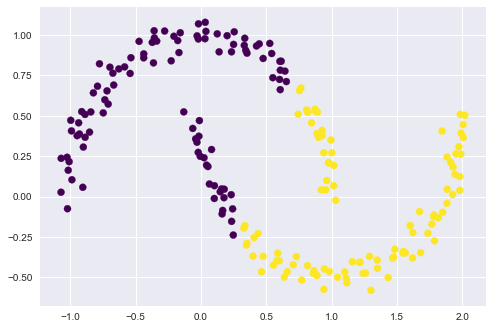

In [28]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
s=50, cmap='viridis');



** k-means 算法只能确定线性聚类边界 **

通过一个核变换将数据投影到更高维的空间，投影后的数据使线性分离成为可能

这种核 k-means 算法在 Scikit-Learn 的 SpectralClustering 评估器中实现，它使用最近
邻图（the graph of nearest neighbors）来计算数据的高维表示，然后用 k-means 算法分配
标签（如图 5-117 所示）：


C:\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


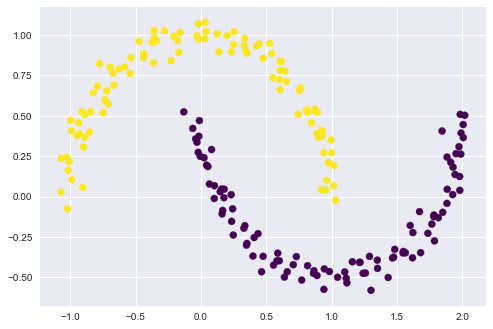

In [29]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2,affinity='nearest_neighbors',assign_labels='kmeans')
labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels,
s=50, cmap='viridis');

## 案例1 K-Means处理手写数字

In [61]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape    #手写数字一共有1797个，每个均为8×8像素的图像

(1797, 64)

In [62]:
kmeans = KMeans(n_clusters=10, random_state=0)   #告诉其有10个簇
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

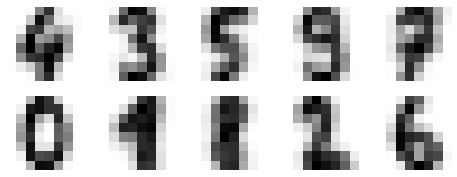

In [63]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [36]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [39]:
### 检查无监督聚类算法在查找相似数字时的准确性了：
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.79354479688369506

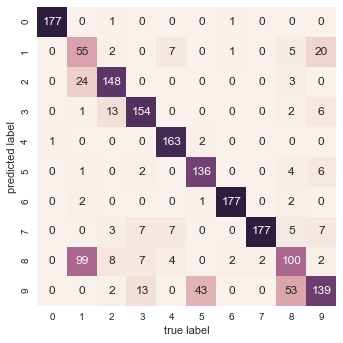

In [41]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=digits.target_names,yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### 使用t-邻域分布嵌入算法

>t-SNE 是一个非线性嵌入算法，特别擅长保留簇中的数据点。

In [45]:
from sklearn.manifold import TSNE
# 投影数据：这一步将耽误几秒钟
tsne = TSNE(n_components=2, init='pca', random_state=0)
digits_proj = tsne.fit_transform(digits.data)
# 计算类
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)
# 排列标签
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
# 计算准确度
accuracy_score(digits.target, labels)

0.94156928213689484

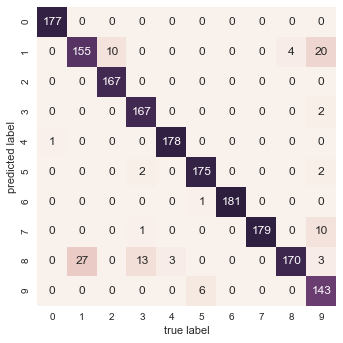

In [46]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=digits.target_names,yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

## 案例2： 将k-means用于色彩压缩

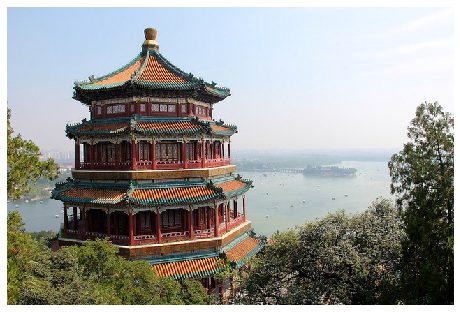

In [47]:
# 需要安装pillow图像程序包
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [48]:
china.shape

(427, 640, 3)

In [49]:
data = china / 255.0 # 转换成0~1区间值
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [51]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    # 随机选择一个子集
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    fig.suptitle(title, size=20);

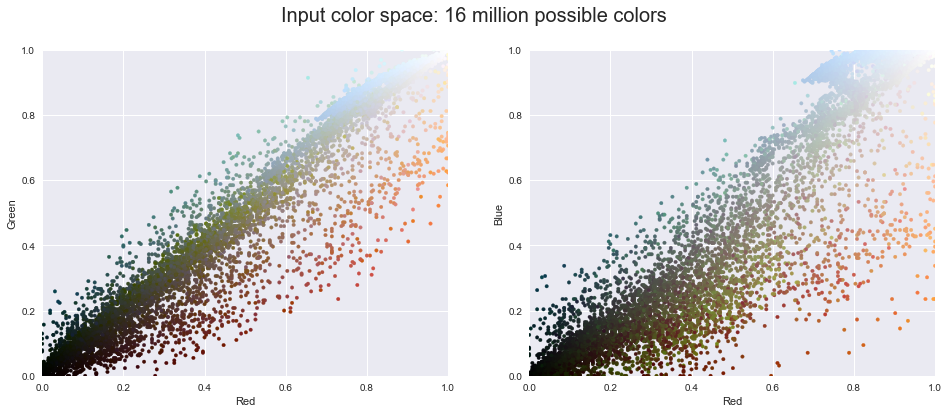

In [52]:
plot_pixels(data, title='Input color space: 16 million possible colors')

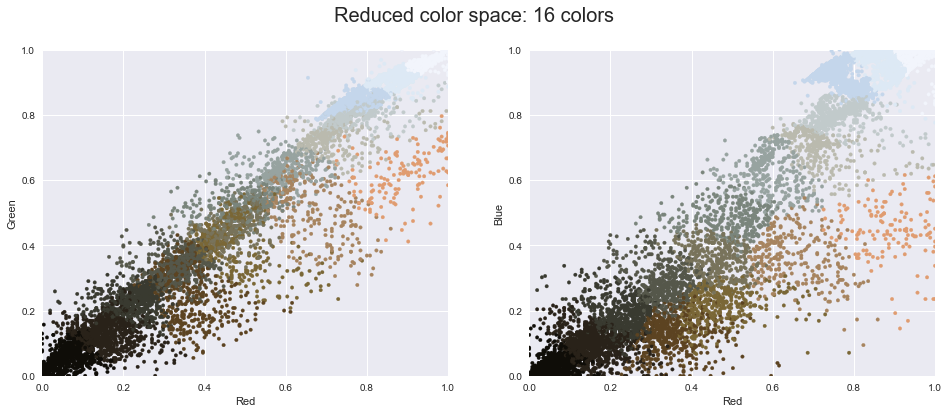

In [53]:
from sklearn.cluster import MiniBatchKMeans #使用MiniBatchKMeans 算法对数据集的子集进行计算
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data, colors=new_colors,
title="Reduced color space: 16 colors")

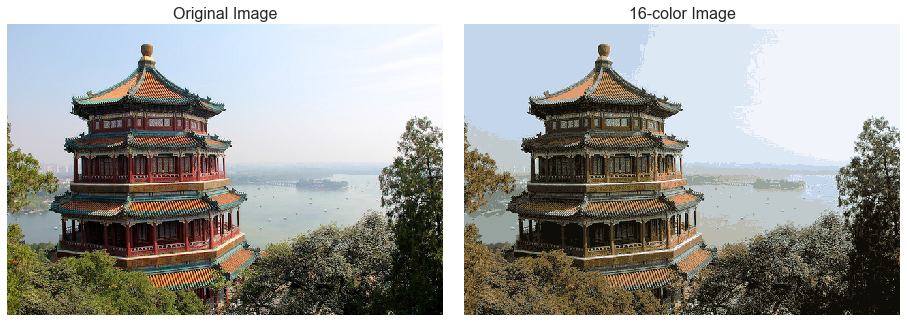

In [55]:
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6),subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);